In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('nyc_taxi_trip_duration Dataset.csv')

In [4]:
data.shape

(729322, 11)

In [5]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [10]:
def UVA(var,dat):
    plt.figure(figsize=(7,8*len(var)),dpi=100)
    for j,i in enumerate(var):
        mini = dat[i].min()
        maxi = dat[i].max()
        range_o = maxi-mini
        mean = dat[i].mean()
        median = dat[i].median()
        stdev = dat[i].std()
        points = mean-stdev,mean+stdev
        quant25 = dat[i].quantile(0.25)
        quant75 = dat[i].quantile(0.75)
        IQR = quant75 - quant25
        r1 = quant25-1.5*IQR
        r2 = quant75+1.5*IQR
        skew = dat[i].skew()
        kurt = dat[i].kurtosis()
        

        plt.subplot(len(var),1,j+1)
        sns.kdeplot(dat[i],shade=True)
        sns.lineplot(points,[0,0],color='r',label='Std_Dev')
        sns.scatterplot([mini,maxi],[0,0],color='g',label='Min/Max')
        sns.scatterplot([median],[0],color='b',label='Median')
        plt.xlabel('{}'.format(i))
        plt.ylabel('Density')
        plt.title('stdev:{}; min-max:{}; mean:{};\n median:{}; skewness:{}; kurtosis:{}'.
                  format((round(points[0],2),round(points[1],2)),(round(mini,2),round(maxi,2)),round(mean,2),round(median,2),
                        round(skew,2),round(kurt,2)))

In [11]:
var1 = ['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude','trip_duration']

Var1 represents the features which have float datatypes, which are used for univariate analysis

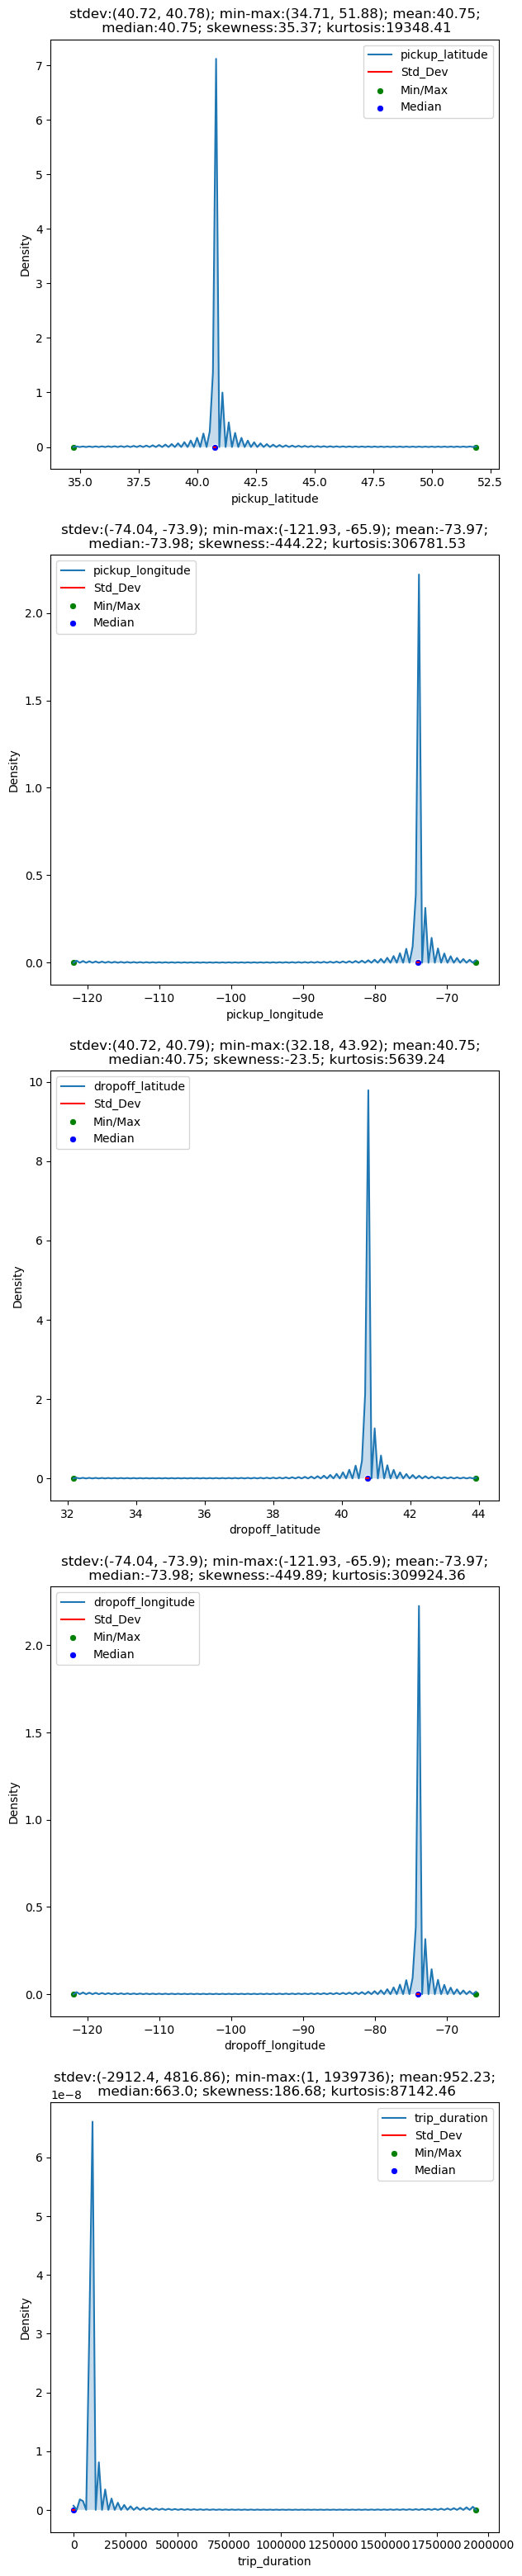

In [12]:
UVA(var1,data)

In [13]:
data_1 = data.loc[(data.trip_duration >30) & (data.trip_duration<3600)]

In [14]:
data_1.reset_index().head()

,index,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [15]:
data_1.shape

(720837, 11)

Data contains lot of outliers, trip duration is the target variable. In trip duration we take values which are lesser than one hour ie 3600s and greater than 30s, using these criterion we create a new subset data_1.

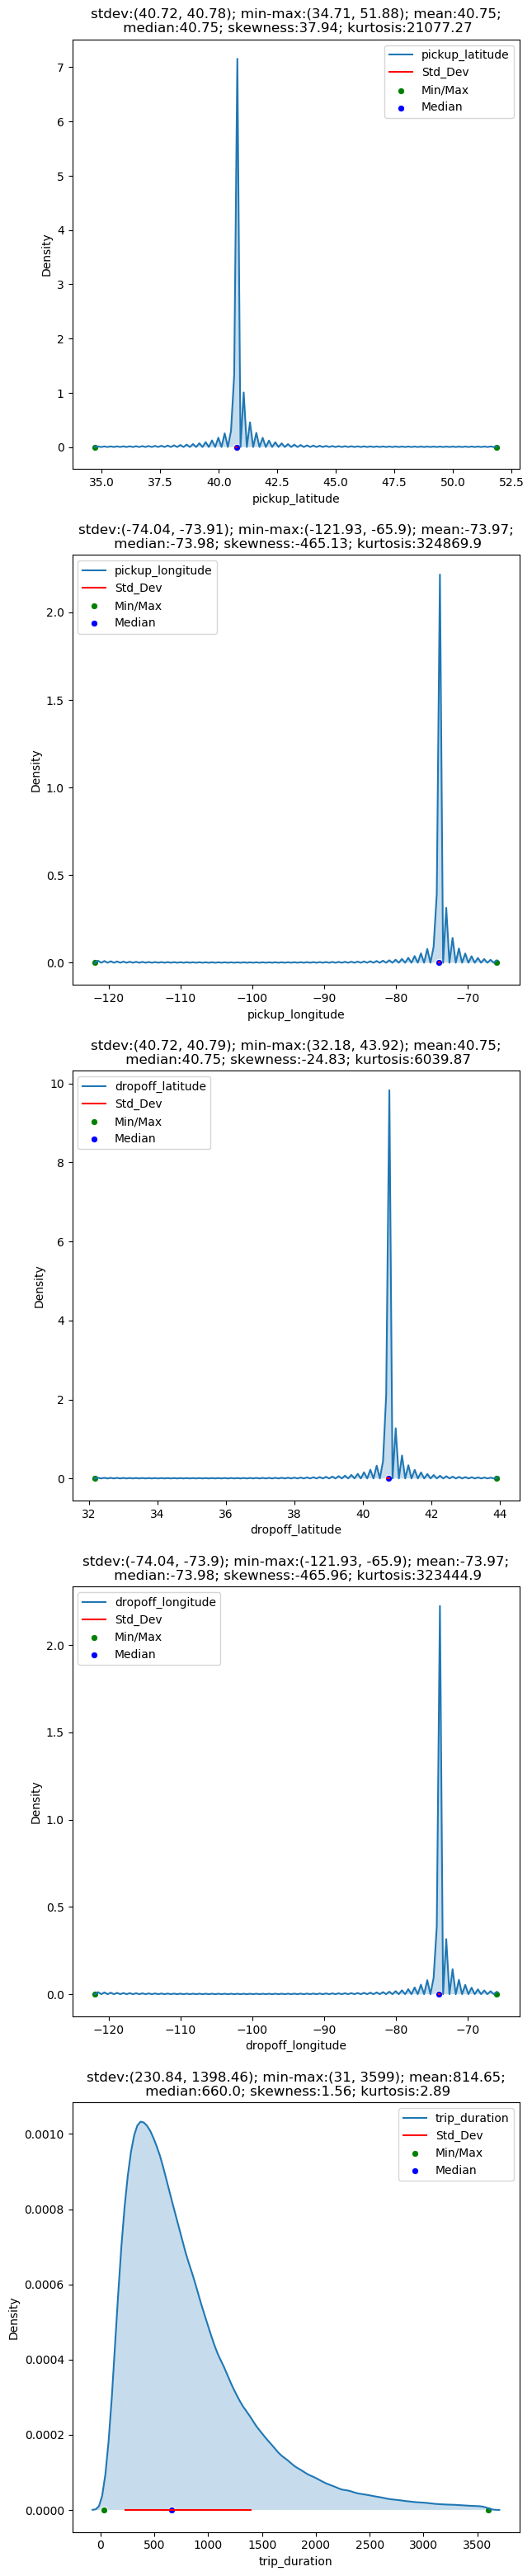

In [16]:
UVA(var1,data_1)

In [17]:
import datetime as dt

In [18]:
data_1['pickup_datetime'] = pd.to_datetime(data_1['pickup_datetime'])
data_1['month_of_pick'] = data_1['pickup_datetime'].dt.month
data_1['week_of_pick'] = data_1['pickup_datetime'].dt.dayofweek
data_1['hour_of_day'] = data_1['pickup_datetime'].dt.hour


In [19]:
data_1.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
month_of_pick                  int64
week_of_pick                   int64
hour_of_day                    int64
dtype: object

In [20]:
data_1['vendor_id'] = data_1['vendor_id'].astype('category')
data_1['passenger_count'] = data_1['passenger_count'].astype('category')
data_1['month_of_pick'] = data_1['month_of_pick'].astype('category')
data_1['week_of_pick'] = data_1['week_of_pick'].astype('category')
data_1['hour_of_day'] = data_1['hour_of_day'].astype('category')
data_1['store_and_fwd_flag'] = data_1['store_and_fwd_flag'].map({'N':0,'Y':1}).astype('category')

In [21]:
data_1.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime              object
passenger_count             category
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
month_of_pick               category
week_of_pick                category
hour_of_day                 category
dtype: object

In [22]:
data_1=data_1.drop(['pickup_datetime','dropoff_datetime','id'],axis=1)
data_1.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month_of_pick,week_of_pick,hour_of_day
0,2,1,-73.953918,40.778873,-73.963875,40.771164,0,400,2,0,16
1,1,2,-73.988312,40.731743,-73.994751,40.694931,0,1100,3,4,23
2,2,2,-73.997314,40.721458,-73.948029,40.774918,0,1635,2,6,17
3,2,6,-73.961670,40.759720,-73.956779,40.780628,0,1141,1,1,9
4,1,1,-74.017120,40.708469,-73.988182,40.740631,0,848,2,2,6


In [23]:
data_1 = pd.get_dummies(data_1)

In [24]:
data_1.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,...,hour_of_day_14,hour_of_day_15,hour_of_day_16,hour_of_day_17,hour_of_day_18,hour_of_day_19,hour_of_day_20,hour_of_day_21,hour_of_day_22,hour_of_day_23
0,-73.953918,40.778873,-73.963875,40.771164,400,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,-73.988312,40.731743,-73.994751,40.694931,1100,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-73.997314,40.721458,-73.948029,40.774918,1635,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,-73.961670,40.759720,-73.956779,40.780628,1141,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-74.017120,40.708469,-73.988182,40.740631,848,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data_1.shape

(720837, 54)

# Feature Selection

In [26]:
x = data_1.drop(['trip_duration'],axis=1)
y = data_1['trip_duration']

Our target variable is trip_duration it is staken as y and all other features are included in x.

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=22,test_size=0.2)

x_train and y_train are the training dataset which contains 80% of the data.

n x_test y_train are the testing dataset.

In [28]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((576669, 53), (576669,), (144168, 53), (144168,))

In [29]:
from sklearn.decomposition import PCA
pca = PCA().fit(x_train)

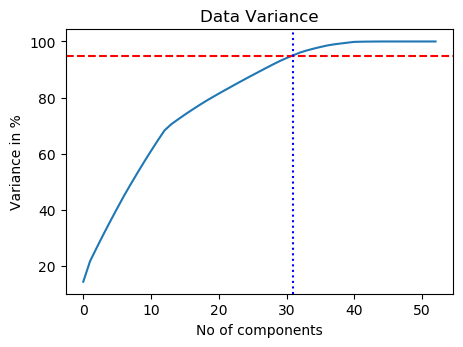

In [30]:
plt.figure(figsize=(5,3.5),dpi=100 )
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('No of components')
plt.ylabel('Variance in %')
plt.title('Data Variance')
plt.axhline(y=95,color='r',linestyle='--')
plt.axvline(x=31,color='b',linestyle=':')
plt.show()

From the figure it can be observed that almost 31 features constitute about 95% of variance and hence the remaining featues can be excluded from the data.

In [31]:
pca = PCA(31).fit(x_train)

In [32]:
x_train_transformed = pd.DataFrame(pca.transform(x_train))
x_test_transformed = pd.DataFrame(pca.transform(x_test))

x_train_transformed and x_test_transformed is the scaled and transformed features selected through pca algorithm.



# KNN 

In [33]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as mae

In [34]:
def Elbow(K):
    test_mse=[]
    for i in K:
        reg= KNN(n_neighbors=i)
        reg.fit(x_train_transformed,y_train)
        tmp = reg.predict(x_test_transformed)
        tmp = mae(tmp,y_test)
        test_mse.append(tmp)
    return test_mse 

In [35]:
k = range(1,30,5)

In [36]:
test = Elbow(k)

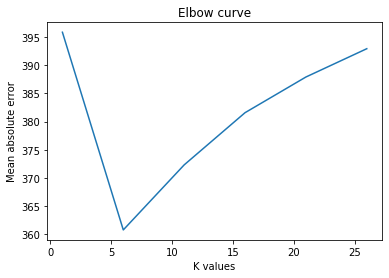

In [37]:
plt.plot(k,test)
plt.xlabel('K values')
plt.ylabel('Mean absolute error')
plt.title('Elbow curve');

From the elbow curve it can be observed that the error is minimum at k = 6, so n_neighbors ac be taken as 6. 

In [38]:
model_1 = KNN(n_neighbors=6)
model_1.fit(x_train_transformed,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                    weights='uniform')

model_1 is the model that is made with KNN regressor.

In [39]:
model_1.score(x_test_transformed,y_test)

0.24755022235363455

# Linear Model

In [40]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [41]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# train error
train_predict = LR.predict(x_train)
k = mae(train_predict,y_train)
print('Train Error: ',k)

Train Error:  397.993287093636


In [43]:
# test error
test_predict = LR.predict(x_test)
k = mae(test_predict,y_test)
print('Test error: ',k)

Test error:  400.2240805865379


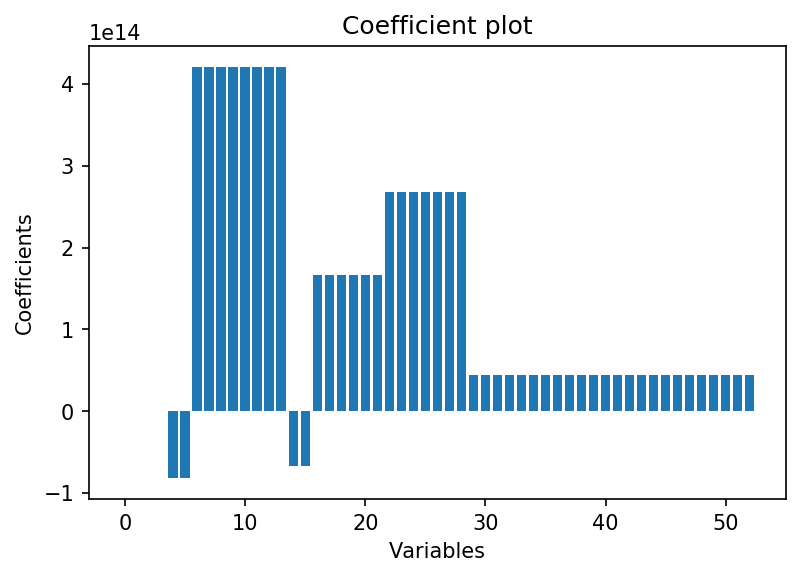

In [44]:
plt.figure(figsize=(6,4),dpi = 150)
u = range(len(LR.coef_))
v = LR.coef_
plt.bar(u,v)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient plot');

Here we set a threshold for coefficients we choose the variables which has coefficient values greater than 1.

In [45]:
coefficients = pd.DataFrame({
    'variables':x_train.columns,
    'coef':v
})

In [46]:
coefficients

,variables,coef
0,pickup_longitude,3.955355e+03
1,pickup_latitude,-2.202356e+03
2,dropoff_longitude,2.041233e+03
3,dropoff_latitude,-2.818867e+03
4,vendor_id_1,-8.240431e+13
5,vendor_id_2,-8.240431e+13
6,passenger_count_0,4.211625e+14
7,passenger_count_1,4.211625e+14
8,passenger_count_2,4.211625e+14
9,passenger_count_3,4.211625e+14


In [47]:
sig_var = coefficients[abs(coefficients.coef)>1e14]
sig_var

,variables,coef
6,passenger_count_0,4.211625e+14
7,passenger_count_1,4.211625e+14
8,passenger_count_2,4.211625e+14
9,passenger_count_3,4.211625e+14
10,passenger_count_4,4.211625e+14
11,passenger_count_5,4.211625e+14
12,passenger_count_6,4.211625e+14
13,passenger_count_9,4.211625e+14
16,month_of_pick_1,1.658199e+14
17,month_of_pick_2,1.658199e+14


In [48]:
x_train_1 = x_train[sig_var['variables'].values]
x_test_1 = x_test[sig_var['variables'].values]

In [49]:
x_train_1.reset_index().head()

,index,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_9,month_of_pick_1,...,month_of_pick_4,month_of_pick_5,month_of_pick_6,week_of_pick_0,week_of_pick_1,week_of_pick_2,week_of_pick_3,week_of_pick_4,week_of_pick_5,week_of_pick_6
0,586166,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,533563,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,363091,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44619,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,625919,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


x_train_1 and x_test_1 represent the features which has been selected using the threshold coefficient values.

In [50]:
alpha_ridge = [0,1e-8,1e-4,1e-2,1,5,10,20,25,50,100]

In [51]:
from sklearn.linear_model import Ridge

In [52]:
mae_train=[]
mae_test = []  
for i in range(len(alpha_ridge)):         
    model_2 = Ridge(alpha=alpha_ridge[i],normalize=True)
    model_2.fit(x_train_1,y_train)
    train_pred = model_2.predict(x_train_1)
    test_pred = model_2.predict(x_test_1)
    mae_train.append(mae(train_pred,y_train))
    mae_test.append(mae(test_pred,y_test))
               

In [53]:
rid = pd.DataFrame({
    'alpha_value':alpha_ridge,
    'train_error':mae_train,
    'test_error':mae_test
})
rid

,alpha_value,train_error,test_error
0,0.000000e+00,436.806069,436.269083
1,1.000000e-08,436.807699,436.272568
2,1.000000e-04,436.807710,436.272567
3,1.000000e-02,436.808938,436.272643
4,1.000000e+00,437.298662,436.691880
5,5.000000e+00,438.255299,437.608291
6,1.000000e+01,438.567217,437.910262
7,2.000000e+01,438.764411,438.100985
8,2.500000e+01,438.808036,438.143034
9,5.000000e+01,438.899959,438.231676


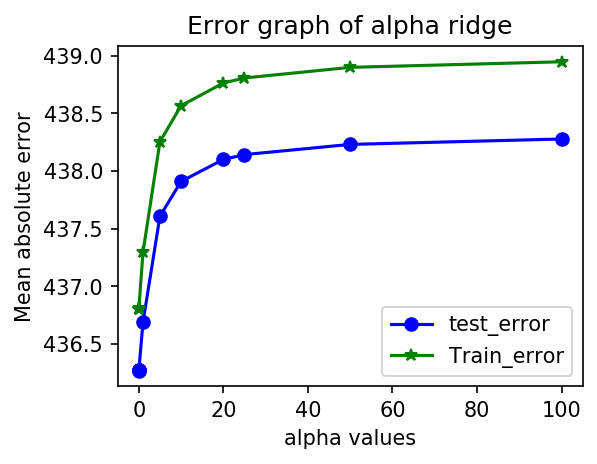

In [54]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(alpha_ridge,mae_test,label='test_error',color='blue',marker='o')
plt.plot(alpha_ridge,mae_train,label='Train_error',color='green',marker='*')
plt.xlabel('alpha values')
plt.ylabel('Mean absolute error')
plt.title('Error graph of alpha ridge')
plt.legend();

In [55]:
model_2.score(x_test_1,y_test)

0.0002034374593758992

# Random forest model

In [56]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(random_state=35,n_estimators=100,max_depth=5,n_jobs=-1)

In [57]:
model_3.fit(x_train_transformed,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=35, verbose=0, warm_start=False)

In [58]:
model_3.score(x_test_transformed,y_test)

0.023519597615250798

In [59]:
model_3.score(x_train_transformed,y_train)

0.02511814033643056

# GBM Model

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
model_4 = GradientBoostingRegressor(n_estimators=100,random_state=67,max_depth=5,min_samples_split=2000,subsample=0.6)

In [62]:
model_4.fit(x_train_transformed,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2000,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=67, subsample=0.6, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
model_4.score(x_test_transformed,y_test)

0.03769138873476574

In [65]:
model_4.score(x_train_transformed,y_train)

0.04340582442415486

# Averaging all models

In [66]:
pred1 = model_1.predict(x_test_transformed)
pred2 = model_2.predict(x_train_1)
pred3 = model_3.predict(x_test_transformed)
pred4 = model_4.predict(x_test_transformed)

In [69]:
from statistics import mean
final_pred = np.array([])
for i in range(len(x_test_transformed)):
    final_pred = np.append(final_pred,mean([pred1[i],pred2[i],pred3[i],pred4[i]]))

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,final_pred)

0.14100765943462423